<a href="https://colab.research.google.com/github/Shritej24c/Microspin/blob/master/Notebooks/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
import torch.nn.functional as F

import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

data = pd.read_csv('PWM vs RPM_18-05.csv')
# The data needs to be in csv format and in a folder named 'Intern_dataset'

print(data.shape)
dataset = data.values.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

#Accessing the columns independently
motor_pwm = dataset[:, 0]
rpm = dataset[:, 1]

#Knowing where the Motor Voltage i.e. is zero
#for better data handling
zeros_indices = np.where(motor_pwm == 0)
print(zeros_indices)

t = zeros_indices[0]

#Tells the length of each cycle
r = [j - i for i, j in zip(t[:-1], t[1:])]


#Initializing dictionaries for input and output
d_i = {}
d_o = {}

#Values are 1-D numpy arrays for separate cycle
for x in range(len(r)):
    d_i['input {0}'.format(x + 1)] = motor_pwm[t[x]:t[x + 1]]
    d_o['output {0}'.format(x + 1)] = rpm[t[x]:t[x + 1]]



#Splitting of dataset
testX = np.array([])
testY = np.array([])
trainX = np.array([])
trainY = np.array([])

i_choices = []
o_choices = []

import random


#Length of Test data
while len(testX) < 1e4:
    ikey = random.choice(list(d_i))
    if ikey in i_choices:
        continue
    else:
        i_choices.append(ikey)
        testX = np.concatenate([testX, d_i[ikey]])
        okey = 'output ' + [int(s) for s in ikey.split() if s.isdigit()][0].__str__()
        o_choices.append(okey)
        testY = np.concatenate([testY, d_o[okey]])

Xkey = list(d_i)
Ykey = list(d_o)

for i in i_choices:
    Xkey.remove(i)

for o in o_choices:
    Ykey.remove(o)

for x in Xkey:
    trainX = np.concatenate([trainX, d_i[x]])

for y in Ykey:
    trainY = np.concatenate([trainY, d_o[y]])


def create_dataset(X, Y, look_back=1):
    dataX, dataY = [], []
    for i in range(len(X) - look_back - 1):
        a = X[i:(i + look_back)]
        dataX.append(a)
        dataY.append(Y[i + look_back])
    return np.array(dataX), np.array(dataY)


#Creating the data shape for training RNN with timepteps dependency in look_back
look_back = 16


Xtrain, Ytrain = create_dataset(trainX, trainY, look_back=look_back)
Xtest, Ytest = create_dataset(testX, testY, look_back=look_back)


X_train = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], 1))
X_test = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], 1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Ytrain, epochs=100, batch_size=1, verbose=2)



(36954, 2)
(array([    0,   217,   496,   835,  1234,  1693,  2210,  2789,  3428,
        4127,  4886,  5705,  6583,  6599,  6728,  6887,  7076,  7294,
        7543,  7823,  8131,  8470,  8839,  9237,  9666, 10123, 10612,
       11130, 11151, 11250, 11369, 11508, 11666, 11845, 12043, 12262,
       12501, 12760, 13038, 13336, 13654, 13993, 14010, 14094, 14193,
       14306, 14434, 14578, 14736, 14910, 15098, 15302, 15519, 15752,
       16000, 16264, 16542, 16543, 16611, 16689, 16777, 16875, 16983,
       17101, 17229, 17367, 17515, 17673, 17841, 18019, 18207, 18269,
       18337, 18413, 18497, 18589, 18687, 18793, 18907, 19029, 19157,
       19293, 19437, 19589, 19645, 19707, 19775, 19849, 19929, 20015,
       20107, 20204, 20308, 20418, 20534, 20655, 20783, 20784, 20831,
       20881, 20935, 20991, 21051, 21112, 21178, 21247, 21320, 21394,
       21472, 21552, 21636, 21684, 21734, 21786, 21842, 21900, 21961,
       22025, 22091, 22160, 22232, 22306, 22384, 22464, 22511, 22559,
       2

In [0]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import random

import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
import torch.nn.functional as F

import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

data = pd.read_csv('PWM vs RPM_18-05.csv')
# The data needs to be in csv format and in a folder named 'Intern_dataset'

print(data.shape)
dataset = data.values.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


# Accessing the columns independently
motor_pwm = dataset[:, 0]
rpm = dataset[:, 1]


# Knowing where the Motor Voltage i.e. is zero for better data handling
zeros_indices = np.where(motor_pwm == 0)
print(zeros_indices)

t = zeros_indices[0]

# Tells the length of each cycle
r = [j - i for i, j in zip(t[:-1], t[1:])]


# Initializing dictionaries for input and output
d_i = {}
d_o = {}

# Values are 1-D numpy arrays for separate cycle
for x in range(len(r)):
    d_i['input {0}'.format(x + 1)] = motor_pwm[t[x]:t[x + 1]]
    d_o['output {0}'.format(x + 1)] = rpm[t[x]:t[x + 1]]



# Splitting of dataset
testX = np.array([])
testY = np.array([])
trainX = np.array([])
trainY = np.array([])

i_choices = []
o_choices = []


# Length of Test data
while len(testX) < 1e4:
    ikey = random.choice(list(d_i))
    if ikey in i_choices:
        continue
    else:
        i_choices.append(ikey)
        testX = np.concatenate([testX, d_i[ikey]])
        okey = 'output ' + [int(s) for s in ikey.split() if s.isdigit()][0].__str__()
        o_choices.append(okey)
        testY = np.concatenate([testY, d_o[okey]])

Xkey = list(d_i)
Ykey = list(d_o)

for i in i_choices:
    Xkey.remove(i)

for o in o_choices:
    Ykey.remove(o)

for x in Xkey:
    trainX = np.concatenate([trainX, d_i[x]])

for y in Ykey:
    trainY = np.concatenate([trainY, d_o[y]])


def create_dataset(X, Y, look_back=1):
    dataX, dataY = [], []
    for i in range(len(X) - look_back - 1):
        a = X[i:(i + look_back)]
        dataX.append(a)
        dataY.append(Y[i + look_back])
    return np.array(dataX), np.array(dataY)


# Creating the data shape for training RNN with timepteps dependency in look_back
look_back = 16


Xtrain, Ytrain = create_dataset(trainX, trainY, look_back=look_back)
Xtest, Ytest = create_dataset(testX, testY, look_back=look_back)


X_train = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], 1))
X_test = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], 1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(8, input_shape=(look_back, 1)))
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae'])
model.summary()
model.fit(X_train, Ytrain, epochs=100, batch_size=32, verbose=2, validation_data=(X_test, Ytest))

# Evaluating the model
scores = model.evaluate(X_test, Ytest)
print(model.metrics_names)
print(scores)

# Predicting
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

# inverting the scalar
ytrain = np.zeros(shape=(len(trainPredict), 2))
ytrain[:, 0] = trainPredict[:, 0]
ytrain[:, 1] = Ytrain
ytrain = scaler.inverse_transform(ytrain)

ytest = np.zeros(shape=(len(testPredict), 2))
ytest[:, 0] = testPredict[:, 0]
ytest[:, 1] = Ytest
ytest = scaler.inverse_transform(ytest)

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(ytrain[:, 0], ytrain[:, 1]))
print('Train Score: %.2f RMSE' % trainScore)
testScore = math.sqrt(mean_squared_error(ytest[:, 0], ytest[:, 1]))
print('Train Score: %.2f RMSE' % testScore)


# shift train predictions for plotting
trainPredictPlot = np.empty_like(rpm)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

(36954, 2)
(array([    0,   217,   496,   835,  1234,  1693,  2210,  2789,  3428,
        4127,  4886,  5705,  6583,  6599,  6728,  6887,  7076,  7294,
        7543,  7823,  8131,  8470,  8839,  9237,  9666, 10123, 10612,
       11130, 11151, 11250, 11369, 11508, 11666, 11845, 12043, 12262,
       12501, 12760, 13038, 13336, 13654, 13993, 14010, 14094, 14193,
       14306, 14434, 14578, 14736, 14910, 15098, 15302, 15519, 15752,
       16000, 16264, 16542, 16543, 16611, 16689, 16777, 16875, 16983,
       17101, 17229, 17367, 17515, 17673, 17841, 18019, 18207, 18269,
       18337, 18413, 18497, 18589, 18687, 18793, 18907, 19029, 19157,
       19293, 19437, 19589, 19645, 19707, 19775, 19849, 19929, 20015,
       20107, 20204, 20308, 20418, 20534, 20655, 20783, 20784, 20831,
       20881, 20935, 20991, 21051, 21112, 21178, 21247, 21320, 21394,
       21472, 21552, 21636, 21684, 21734, 21786, 21842, 21900, 21961,
       22025, 22091, 22160, 22232, 22306, 22384, 22464, 22511, 22559,
       2

ValueError: ignored

In [0]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(rpm)
trainPredictPlot = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

TypeError: ignored

In [3]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import random

import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU, RNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

data = pd.read_csv('PWM vs RPM_18-05.csv')
# The data needs to be in csv format and in a folder named 'Intern_dataset'

print(data.shape)
dataset = data.values.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


# Accessing the columns independently
motor_pwm = dataset[:, 0]
rpm = dataset[:, 1]


# Knowing where the Motor Voltage i.e. is zero for better data handling
zeros_indices = np.where(motor_pwm == 0)
print(zeros_indices)

t = zeros_indices[0]

# Tells the length of each cycle
r = [j - i for i, j in zip(t[:-1], t[1:])]


# Initializing dictionaries for input and output
d_i = {}
d_o = {}

# Values are 1-D numpy arrays for separate cycle
for x in range(len(r)):
    d_i['input {0}'.format(x + 1)] = motor_pwm[t[x]:t[x + 1]]
    d_o['output {0}'.format(x + 1)] = rpm[t[x]:t[x + 1]]



# Splitting of dataset
testX = np.array([])
testY = np.array([])
trainX = np.array([])
trainY = np.array([])

i_choices = []
o_choices = []


# Length of Test data
while len(testX) < 1e4:
    ikey = random.choice(list(d_i))
    if ikey in i_choices:
        continue
    else:
        i_choices.append(ikey)
        testX = np.concatenate([testX, d_i[ikey]])
        okey = 'output ' + [int(s) for s in ikey.split() if s.isdigit()][0].__str__()
        o_choices.append(okey)
        testY = np.concatenate([testY, d_o[okey]])

Xkey = list(d_i)
Ykey = list(d_o)

for i in i_choices:
    Xkey.remove(i)

for o in o_choices:
    Ykey.remove(o)

for x in Xkey:
    trainX = np.concatenate([trainX, d_i[x]])

for y in Ykey:
    trainY = np.concatenate([trainY, d_o[y]])


def create_dataset(X, Y, look_back=1):
    dataX, dataY = [], []
    for i in range(len(X) - look_back - 1):
        a = X[i:(i + look_back)]
        dataX.append(a)
        dataY.append(Y[i + look_back])
    return np.array(dataX), np.array(dataY)


# Creating the data shape for training RNN with timepteps dependency in look_back
look_back = 16


Xtrain, Ytrain = create_dataset(trainX, trainY, look_back=look_back)
Xtest, Ytest = create_dataset(testX, testY, look_back=look_back)


X_train = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], 1))
X_test = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], 1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(8, input_shape=(look_back, 1)))
model.add(Dense(1, activation='relu'))
history = model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae'])
model.summary()
model.fit(X_train, Ytrain, epochs=100, batch_size=32, verbose=2, validation_data=(X_test, Ytest))

# Evaluating the model
scores = model.evaluate(X_test, Ytest)
print(model.metrics_names)
print(scores)


# Plot the Metrics 
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['mean_absolute_error'])


# Predicting
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

# inverting the scalar
ytrain = np.zeros(shape=(len(trainPredict), 2))
ytrain[:, 0] = trainPredict[:, 0]
ytrain[:, 1] = Ytrain
ytrain = scaler.inverse_transform(ytrain)

ytest = np.zeros(shape=(len(testPredict), 2))
ytest[:, 0] = testPredict[:, 0]
ytest[:, 1] = Ytest
ytest = scaler.inverse_transform(ytest)

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(ytrain[:, 0], ytrain[:, 1]))
print('Train Score: %.2f RMSE' % trainScore)
testScore = math.sqrt(mean_squared_error(ytest[:, 0], ytest[:, 1]))
print('Train Score: %.2f RMSE' % testScore)

(36954, 2)
(array([    0,   217,   496,   835,  1234,  1693,  2210,  2789,  3428,
        4127,  4886,  5705,  6583,  6599,  6728,  6887,  7076,  7294,
        7543,  7823,  8131,  8470,  8839,  9237,  9666, 10123, 10612,
       11130, 11151, 11250, 11369, 11508, 11666, 11845, 12043, 12262,
       12501, 12760, 13038, 13336, 13654, 13993, 14010, 14094, 14193,
       14306, 14434, 14578, 14736, 14910, 15098, 15302, 15519, 15752,
       16000, 16264, 16542, 16543, 16611, 16689, 16777, 16875, 16983,
       17101, 17229, 17367, 17515, 17673, 17841, 18019, 18207, 18269,
       18337, 18413, 18497, 18589, 18687, 18793, 18907, 19029, 19157,
       19293, 19437, 19589, 19645, 19707, 19775, 19849, 19929, 20015,
       20107, 20204, 20308, 20418, 20534, 20655, 20783, 20784, 20831,
       20881, 20935, 20991, 21051, 21112, 21178, 21247, 21320, 21394,
       21472, 21552, 21636, 21684, 21734, 21786, 21842, 21900, 21961,
       22025, 22091, 22160, 22232, 22306, 22384, 22464, 22511, 22559,
       2

KeyboardInterrupt: ignored

In [4]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import random

import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU, RNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

data = pd.read_csv('PWM vs RPM_18-05.csv')
# The data needs to be in csv format and in a folder named 'Intern_dataset'

print(data.shape)
dataset = data.values.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


# Accessing the columns independently
motor_pwm = dataset[:, 0]
rpm = dataset[:, 1]


# Knowing where the Motor Voltage i.e. is zero for better data handling
zeros_indices = np.where(motor_pwm == 0)
print(zeros_indices)

t = zeros_indices[0]

# Tells the length of each cycle
r = [j - i for i, j in zip(t[:-1], t[1:])]


# Initializing dictionaries for input and output
d_i = {}
d_o = {}

# Values are 1-D numpy arrays for separate cycle
for x in range(len(r)):
    d_i['input {0}'.format(x + 1)] = motor_pwm[t[x]:t[x + 1]]
    d_o['output {0}'.format(x + 1)] = rpm[t[x]:t[x + 1]]



# Splitting of dataset
testX = np.array([])
testY = np.array([])
trainX = np.array([])
trainY = np.array([])

i_choices = []
o_choices = []


# Length of Test data
while len(testX) < 1e4:
    ikey = random.choice(list(d_i))
    if ikey in i_choices:
        continue
    else:
        i_choices.append(ikey)
        testX = np.concatenate([testX, d_i[ikey]])
        okey = 'output ' + [int(s) for s in ikey.split() if s.isdigit()][0].__str__()
        o_choices.append(okey)
        testY = np.concatenate([testY, d_o[okey]])

Xkey = list(d_i)
Ykey = list(d_o)

for i in i_choices:
    Xkey.remove(i)

for o in o_choices:
    Ykey.remove(o)

for x in Xkey:
    trainX = np.concatenate([trainX, d_i[x]])

for y in Ykey:
    trainY = np.concatenate([trainY, d_o[y]])


def create_dataset(X, Y, look_back=1):
    dataX, dataY = [], []
    for i in range(len(X) - look_back - 1):
        a = X[i:(i + look_back)]
        dataX.append(a)
        dataY.append(Y[i + look_back])
    return np.array(dataX), np.array(dataY)


# Creating the data shape for training RNN with timepteps dependency in look_back
look_back = 16


Xtrain, Ytrain = create_dataset(trainX, trainY, look_back=look_back)
Xtest, Ytest = create_dataset(testX, testY, look_back=look_back)


X_train = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], 1))
X_test = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], 1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(8, input_shape=(look_back, 1)))
model.add(Dense(1, activation='relu'))
history = model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae'])
model.summary()
model.fit(X_train, Ytrain, epochs=100, batch_size=32, verbose=2, validation_data=(X_test, Ytest))

# Evaluating the model
scores = model.evaluate(X_test, Ytest)
print(model.metrics_names)
print(scores)


# Plot the Metrics 
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['mean_absolute_error'])


# Predicting
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

# inverting the scalar
ytrain = np.zeros(shape=(len(trainPredict), 2))
ytrain[:, 0] = trainPredict[:, 0]
ytrain[:, 1] = Ytrain
ytrain = scaler.inverse_transform(ytrain)

ytest = np.zeros(shape=(len(testPredict), 2))
ytest[:, 0] = testPredict[:, 0]
ytest[:, 1] = Ytest
ytest = scaler.inverse_transform(ytest)

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(ytrain[:, 0], ytrain[:, 1]))
print('Train Score: %.2f RMSE' % trainScore)
testScore = math.sqrt(mean_squared_error(ytest[:, 0], ytest[:, 1]))
print('Train Score: %.2f RMSE' % testScore)

(36954, 2)
(array([    0,   217,   496,   835,  1234,  1693,  2210,  2789,  3428,
        4127,  4886,  5705,  6583,  6599,  6728,  6887,  7076,  7294,
        7543,  7823,  8131,  8470,  8839,  9237,  9666, 10123, 10612,
       11130, 11151, 11250, 11369, 11508, 11666, 11845, 12043, 12262,
       12501, 12760, 13038, 13336, 13654, 13993, 14010, 14094, 14193,
       14306, 14434, 14578, 14736, 14910, 15098, 15302, 15519, 15752,
       16000, 16264, 16542, 16543, 16611, 16689, 16777, 16875, 16983,
       17101, 17229, 17367, 17515, 17673, 17841, 18019, 18207, 18269,
       18337, 18413, 18497, 18589, 18687, 18793, 18907, 19029, 19157,
       19293, 19437, 19589, 19645, 19707, 19775, 19849, 19929, 20015,
       20107, 20204, 20308, 20418, 20534, 20655, 20783, 20784, 20831,
       20881, 20935, 20991, 21051, 21112, 21178, 21247, 21320, 21394,
       21472, 21552, 21636, 21684, 21734, 21786, 21842, 21900, 21961,
       22025, 22091, 22160, 22232, 22306, 22384, 22464, 22511, 22559,
       2

KeyboardInterrupt: ignored

(36954, 2)
(array([    0,   217,   496,   835,  1234,  1693,  2210,  2789,  3428,
        4127,  4886,  5705,  6583,  6599,  6728,  6887,  7076,  7294,
        7543,  7823,  8131,  8470,  8839,  9237,  9666, 10123, 10612,
       11130, 11151, 11250, 11369, 11508, 11666, 11845, 12043, 12262,
       12501, 12760, 13038, 13336, 13654, 13993, 14010, 14094, 14193,
       14306, 14434, 14578, 14736, 14910, 15098, 15302, 15519, 15752,
       16000, 16264, 16542, 16543, 16611, 16689, 16777, 16875, 16983,
       17101, 17229, 17367, 17515, 17673, 17841, 18019, 18207, 18269,
       18337, 18413, 18497, 18589, 18687, 18793, 18907, 19029, 19157,
       19293, 19437, 19589, 19645, 19707, 19775, 19849, 19929, 20015,
       20107, 20204, 20308, 20418, 20534, 20655, 20783, 20784, 20831,
       20881, 20935, 20991, 21051, 21112, 21178, 21247, 21320, 21394,
       21472, 21552, 21636, 21684, 21734, 21786, 21842, 21900, 21961,
       22025, 22091, 22160, 22232, 22306, 22384, 22464, 22511, 22559,
       2

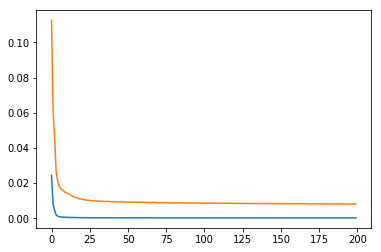

Train Score: 757.76 RMSE
Train Score: 758.93 RMSE


In [5]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import random

import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU, RNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

data = pd.read_csv('PWM vs RPM_18-05.csv')
# The data needs to be in csv format and in a folder named 'Intern_dataset'

print(data.shape)
dataset = data.values.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


# Accessing the columns independently
motor_pwm = dataset[:, 0]
rpm = dataset[:, 1]


# Knowing where the Motor Voltage i.e. is zero for better data handling
zeros_indices = np.where(motor_pwm == 0)
print(zeros_indices)

t = zeros_indices[0]

# Tells the length of each cycle
r = [j - i for i, j in zip(t[:-1], t[1:])]


# Initializing dictionaries for input and output
d_i = {}
d_o = {}

# Values are 1-D numpy arrays for separate cycle
for x in range(len(r)):
    d_i['input {0}'.format(x + 1)] = motor_pwm[t[x]:t[x + 1]]
    d_o['output {0}'.format(x + 1)] = rpm[t[x]:t[x + 1]]



# Splitting of dataset
testX = np.array([])
testY = np.array([])
trainX = np.array([])
trainY = np.array([])

i_choices = []
o_choices = []


# Length of Test data
while len(testX) < 1e4:
    ikey = random.choice(list(d_i))
    if ikey in i_choices:
        continue
    else:
        i_choices.append(ikey)
        testX = np.concatenate([testX, d_i[ikey]])
        okey = 'output ' + [int(s) for s in ikey.split() if s.isdigit()][0].__str__()
        o_choices.append(okey)
        testY = np.concatenate([testY, d_o[okey]])

Xkey = list(d_i)
Ykey = list(d_o)

for i in i_choices:
    Xkey.remove(i)

for o in o_choices:
    Ykey.remove(o)

for x in Xkey:
    trainX = np.concatenate([trainX, d_i[x]])

for y in Ykey:
    trainY = np.concatenate([trainY, d_o[y]])


def create_dataset(X, Y, look_back=1):
    dataX, dataY = [], []
    for i in range(len(X) - look_back - 1):
        a = X[i:(i + look_back)]
        dataX.append(a)
        dataY.append(Y[i + look_back])
    return np.array(dataX), np.array(dataY)


# Creating the data shape for training RNN with timepteps dependency in look_back
look_back = 8


Xtrain, Ytrain = create_dataset(trainX, trainY, look_back=look_back)
Xtest, Ytest = create_dataset(testX, testY, look_back=look_back)


X_train = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], 1))
X_test = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], 1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(8, input_shape=(look_back, 1)))
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae'])
model.summary()
history = model.fit(X_train, Ytrain, epochs=200, batch_size=32, verbose=2, validation_data=(X_test, Ytest))

# Evaluating the model
scores = model.evaluate(X_test, Ytest)
print(model.metrics_names)
print(scores)


# Plot the Metrics 
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['mean_absolute_error'])
plt.show()


# Predicting
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

# inverting the scalar
ytrain = np.zeros(shape=(len(trainPredict), 2))
ytrain[:, 0] = trainPredict[:, 0]
ytrain[:, 1] = Ytrain
ytrain = scaler.inverse_transform(ytrain)

ytest = np.zeros(shape=(len(testPredict), 2))
ytest[:, 0] = testPredict[:, 0]
ytest[:, 1] = Ytest
ytest = scaler.inverse_transform(ytest)

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(ytrain[:, 0], ytrain[:, 1]))
print('Train Score: %.2f RMSE' % trainScore)
testScore = math.sqrt(mean_squared_error(ytest[:, 0], ytest[:, 1]))
print('Train Score: %.2f RMSE' % testScore)

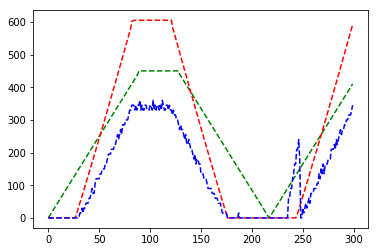

In [22]:
xtrain_like = np.zeros((len(trainX),2))
xtrain_like[:,0] = trainX
xtrain = scaler.inverse_transform(xtrain_like)[:,0]
plt.plot(xtrain[:300],'g--')
plt.plot(ytrain[:, 0][:300], 'r--')
plt.plot(ytrain[:,1][:300], 'b--')
plt.show()

In [19]:
len(ytrain[:,0])

26931

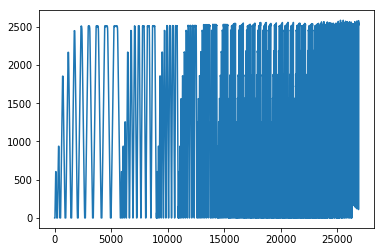

In [18]:
plt.plot(ytrain[:,0])

In [23]:
ytrain

array([[   0.        ,    0.        ],
       [   0.        ,    0.        ],
       [   0.        ,    0.        ],
       ...,
       [2531.83336499, 1484.99997277],
       [2545.75186633, 1484.99997277],
       [2526.73251862, 1484.99997277]])

In [0]:
model.save("LSTM")